
**ASSIGNMENT ONE (COUNT VECTORIZER)**
In a recommendation system based on course titles, using Count Vectorization might recommend courses that have similar frequent words but doesn't necessarily capture the importance of specific words. On the other hand, TF-IDF Vectorization would recommend courses that not only have similar words but also those that have important and discriminative words in common.

For example, if the keyword is "Python", using Count Vectorization might recommend courses with the word "Python" occurring multiple times, regardless of their relevance to the keyword. However, TF-IDF Vectorization would recommend courses that have "Python" as a significant and informative term in their titles, leading to potentially more relevant recommendations.

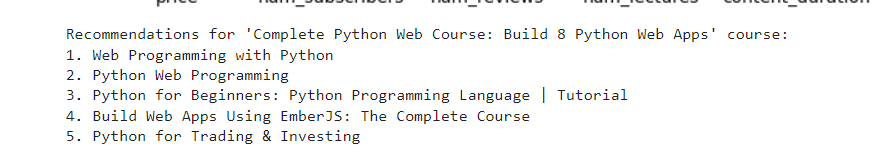



[ABOVE]THIS IS THE RESULT OF TF-IDF VECTORIZARTION


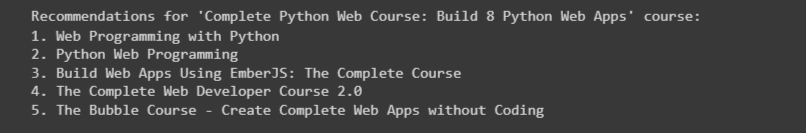



[ABOVE] THIS is the result of cout_vectorizer


Missing Values:
 course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Unique Values:
 course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64


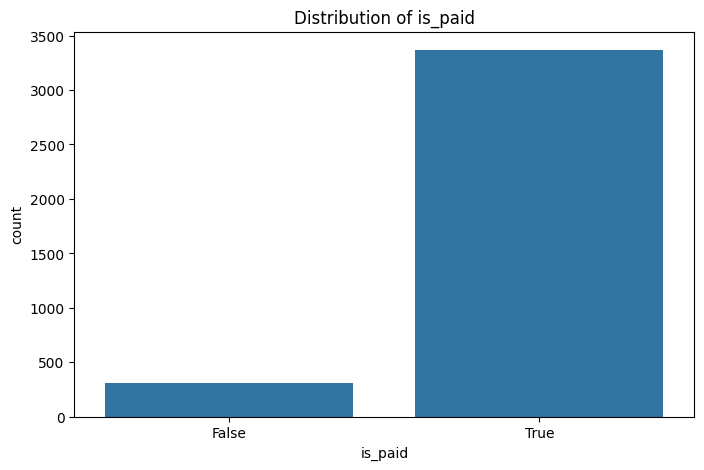

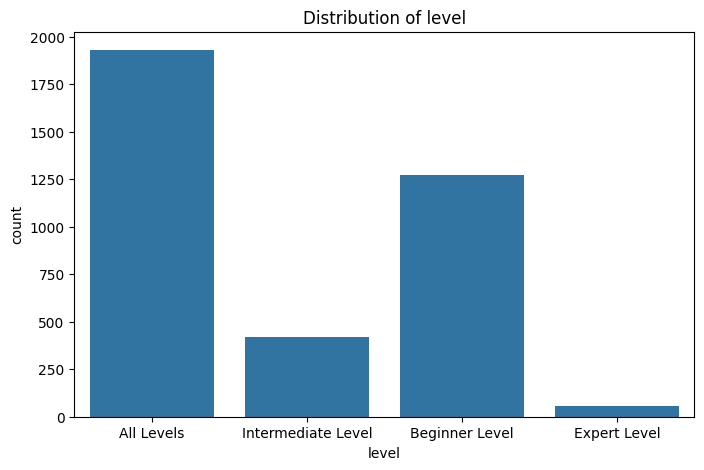

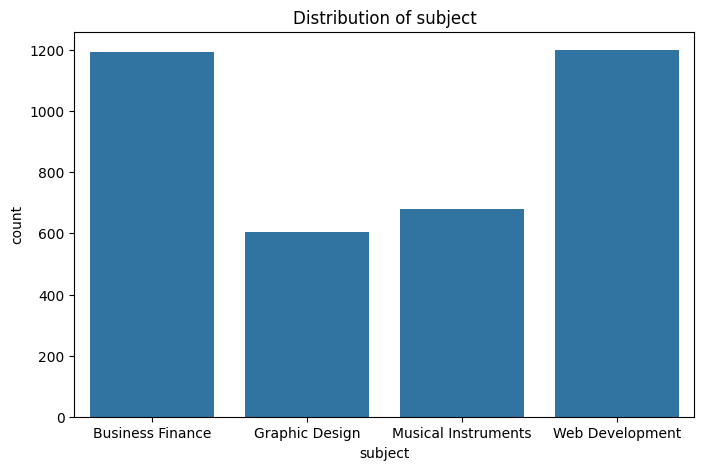

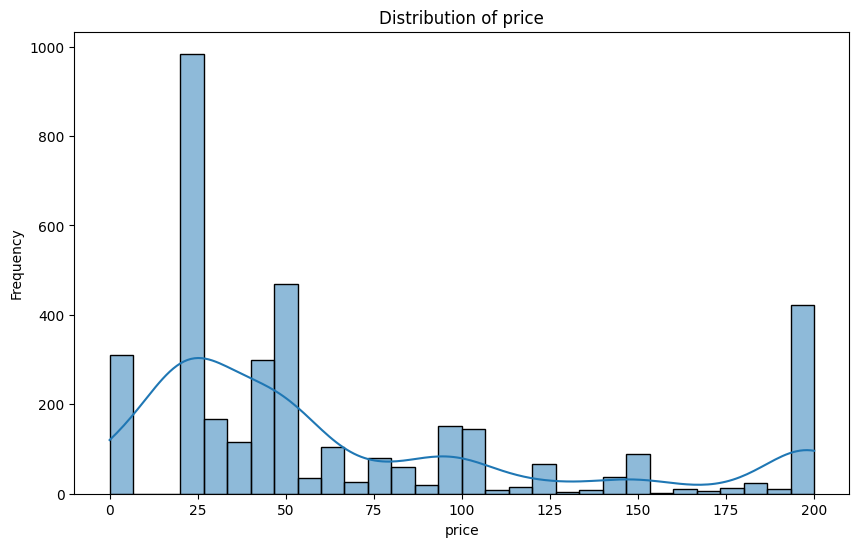

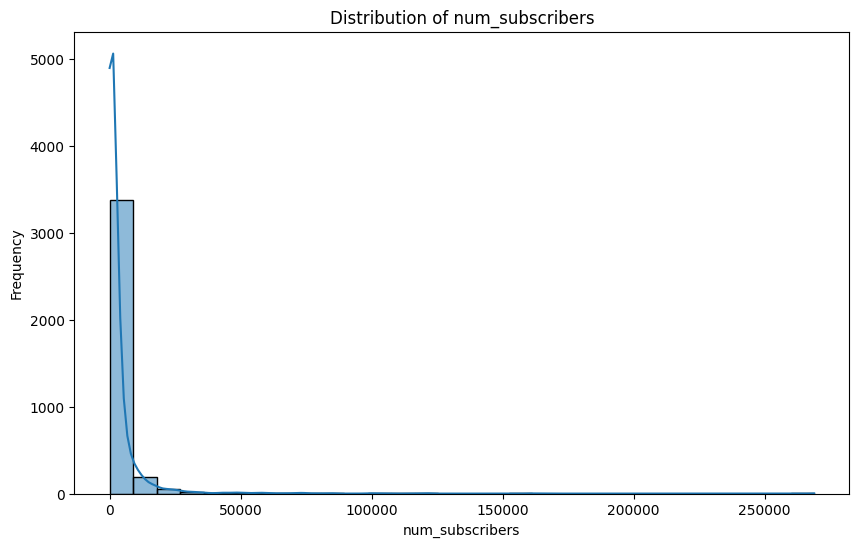

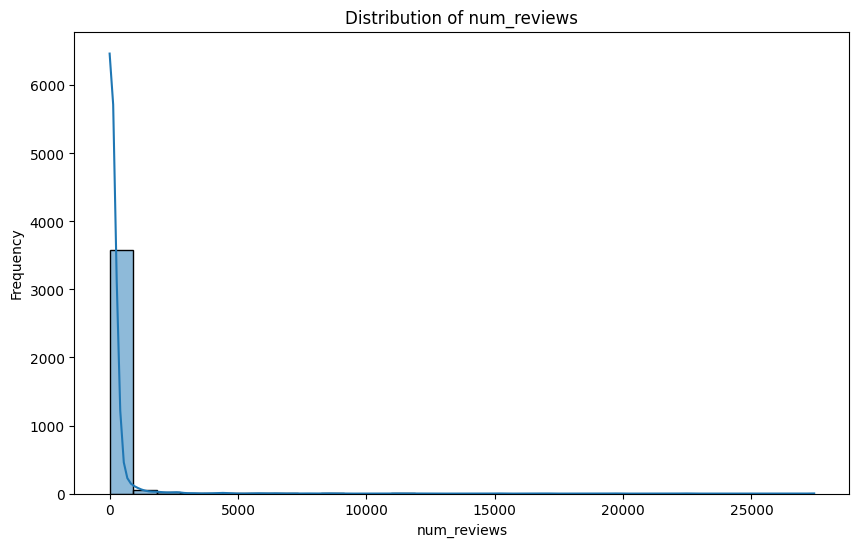

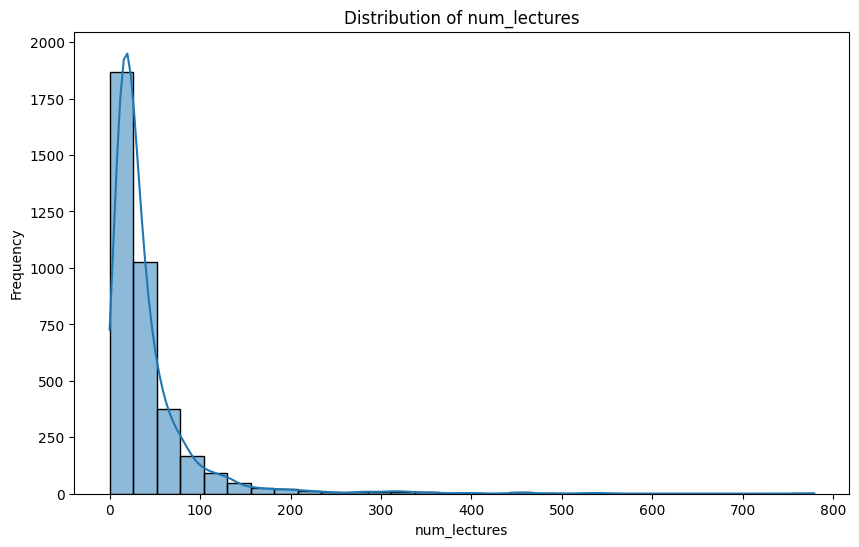

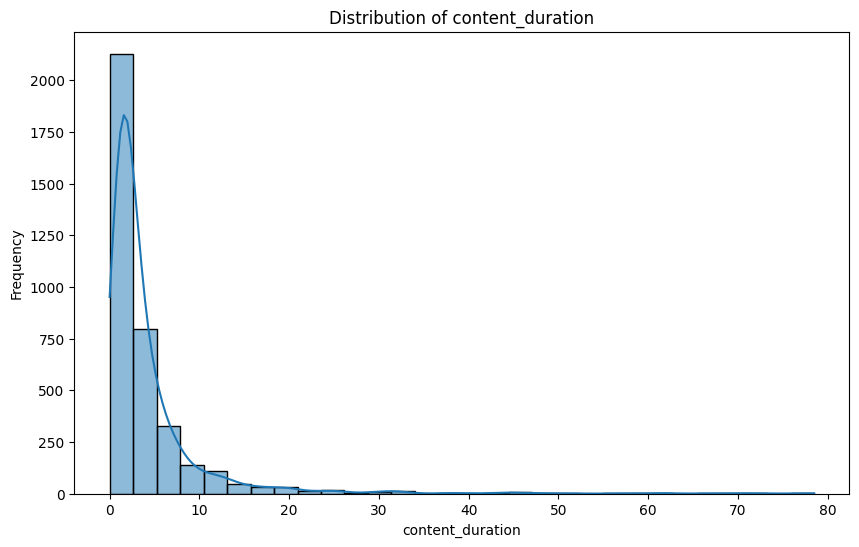

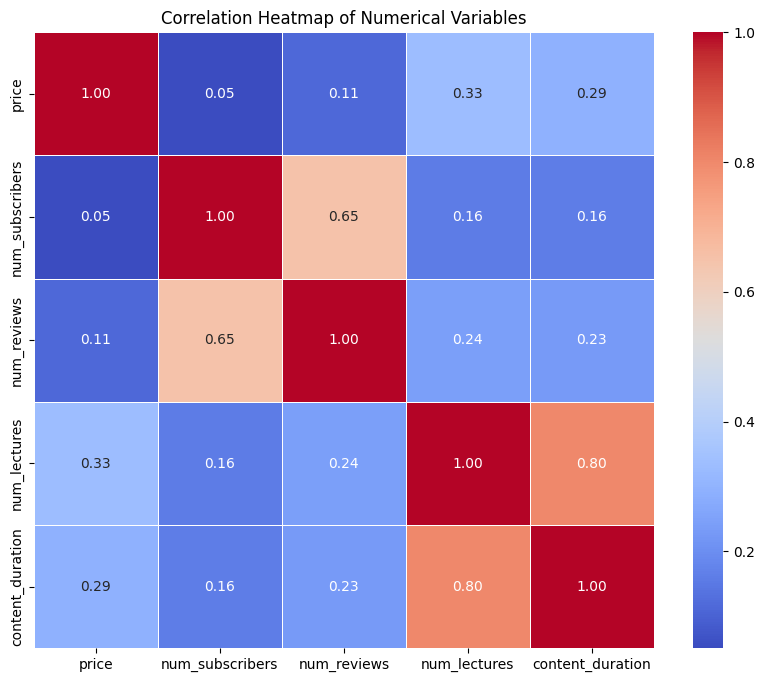


Recommendations for 'Complete Python Web Course: Build 8 Python Web Apps' course:
1. Web Programming with Python
2. Python Web Programming
3. Build Web Apps Using EmberJS: The Complete Course
4. The Complete Web Developer Course 2.0
5. The Bubble Course - Create Complete Web Apps without Coding

Evaluation Metrics for Recommendations based on Number of Reviews:
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Read csv file
def read_csv_file(file_path):
    df = pd.read_csv('/content/udemy_courses.csv')
    return df

# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

# Display unique values for each column
def display_unique_values(df):
    unique_values = df.nunique()
    return unique_values

# Visualize categorical variables
def visualize_categorical_variables(df, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()

# Visualize numerical variables
def visualize_numerical_variables(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Correlation heatmap for numerical variables
def correlation_heatmap(df, num_cols):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()

# Convert categorical variables using one-hot encoding
def encode_categorical(df):
    cat_cols = ['level', 'subject']
    encoder = OneHotEncoder()
    encoded_cols = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(cat_cols))
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(cat_cols, axis=1, inplace=True)
    return df

# Process text data (course_title) using CountVectorizer
def process_text_data(df):
    count_vectorizer = CountVectorizer(stop_words='english')
    count_matrix = count_vectorizer.fit_transform(df['course_title'])
    count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
    df = pd.concat([df, count_df], axis=1)
    df.drop('course_title', axis=1, inplace=True)
    return df

# Normalize numerical variables
def normalize_numerical(df):
    num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

# Feature Engineering Pipeline
def feature_engineering(df):
    # Convert categorical variables
    df = encode_categorical(df)

    # Process text data
    df = process_text_data(df)

    # Normalize numerical variables
    df = normalize_numerical(df)

    return df

# Compute the cosine similarity matrix
def compute_similarity_matrix(count_matrix):
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    return cosine_sim

# Get recommendations based on similarity scores
def get_recommendations(course_title, cosine_sim, df, top_n=5):
    idx = df[df['course_title'] == course_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    course_indices = [i[0] for i in sim_scores]
    return df.iloc[course_indices]['course_title']

# Define function to get predicted recommendations based on number of reviews
def get_predicted_recommendations(df, column='num_reviews', top_n=5):
    predicted_recommendations = df.sort_values(by=column, ascending=False)['course_title'].head(top_n).tolist()
    return predicted_recommendations

# Function to compute evaluation metrics
def evaluate_recommendations(actual, predicted):
    precision = precision_score(actual, predicted, average='micro')
    recall = recall_score(actual, predicted, average='micro')
    f1 = f1_score(actual, predicted, average='micro')
    return precision, recall, f1

def main():
    # Read csv file
    df = read_csv_file('/content/udemy_courses.csv')

    # Check for missing values
    missing_values = check_missing_values(df)
    print("Missing Values:\n", missing_values)

    # Display unique values for each column
    unique_values = display_unique_values(df)
    print("\nUnique Values:\n", unique_values)

    # Visualize categorical variables
    cat_cols = ['is_paid', 'level', 'subject']
    visualize_categorical_variables(df, cat_cols)

    # Visualize numerical variables
    num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
    visualize_numerical_variables(df, num_cols)

    # Correlation heatmap for numerical variables
    correlation_heatmap(df, num_cols)

    # Apply feature engineering to the dataset
    df_featured = feature_engineering(df.copy())

    # Initialize CountVectorizer
    count_vectorizer = CountVectorizer(stop_words='english')
    count_matrix = count_vectorizer.fit_transform(df['course_title'])

    # Compute cosine similarity matrix
    cosine_sim = compute_similarity_matrix(count_matrix)

    # Get recommendations for the course title 'Complete Python Web Course: Build 8 Python Web Apps'
    course_title = 'Complete Python Web Course: Build 8 Python Web Apps'
    recommendations = get_recommendations(course_title, cosine_sim, df, top_n=5)
    print("\nRecommendations for '{}' course:".format(course_title))
    for i, title in enumerate(recommendations):
        print("{}. {}".format(i+1, title))

    # Get predicted recommendations based on number of reviews
    predicted_recommendations_reviews = get_predicted_recommendations(df, column='num_reviews')

    # Evaluate recommendations based on number of reviews
    ground_truth_reviews = df.sort_values(by='num_reviews', ascending=False)['course_title'].head(5).tolist()
    precision_reviews, recall_reviews, f1_reviews = evaluate_recommendations(ground_truth_reviews, predicted_recommendations_reviews)

    # Print evaluation metrics for recommendations based on number of reviews
    print("\nEvaluation Metrics for Recommendations based on Number of Reviews:")
    print("Precision:", precision_reviews)
    print("Recall:", recall_reviews)
    print("F1-score:", f1_reviews)

if __name__ == "__main__":
    main()


)

**ASSIGNMENT 2 (Enter keyword and course is recommended)**

Missing Values:
 course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Unique Values:
 course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64


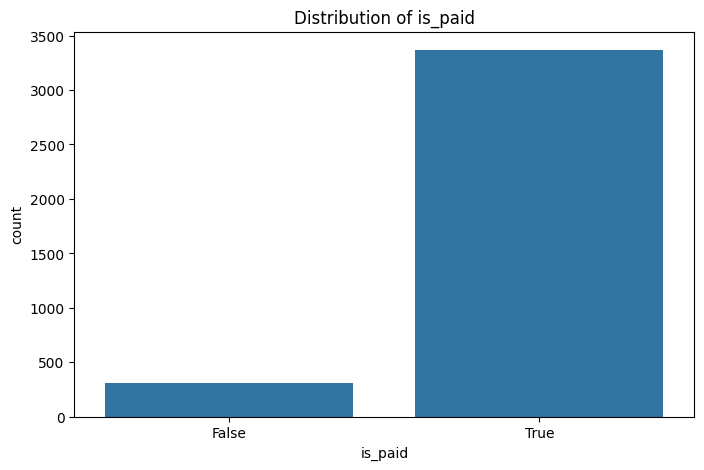

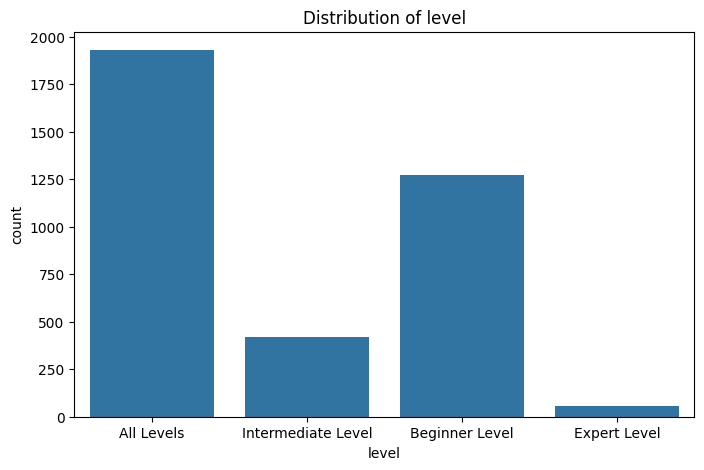

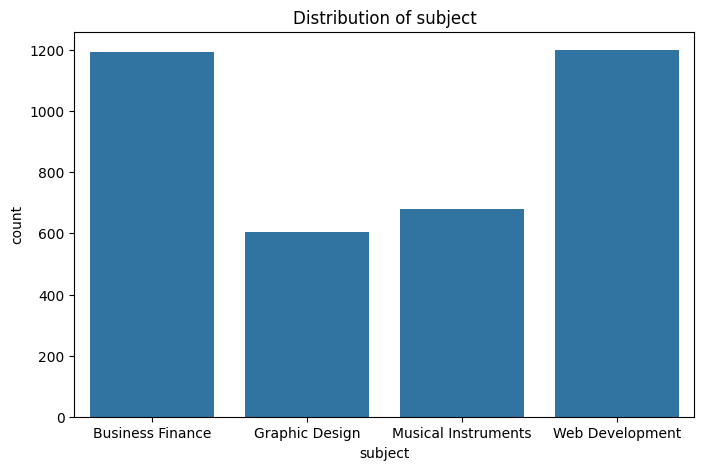

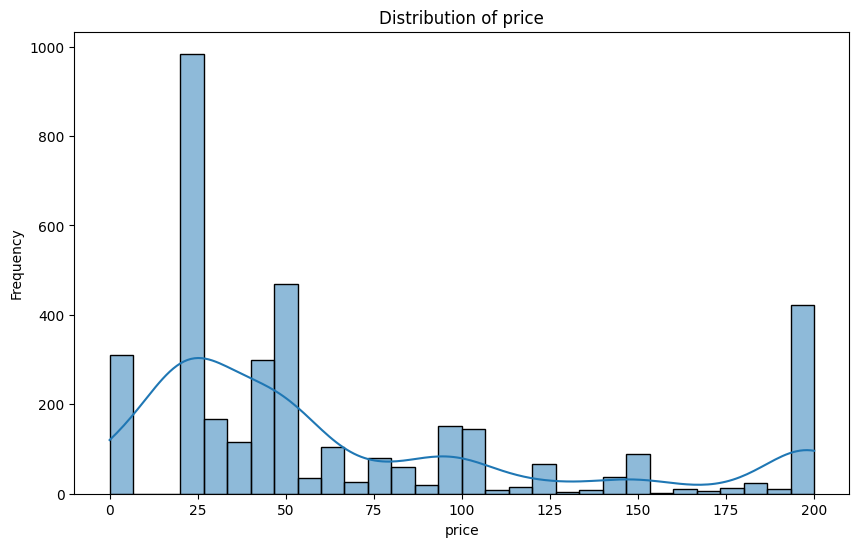

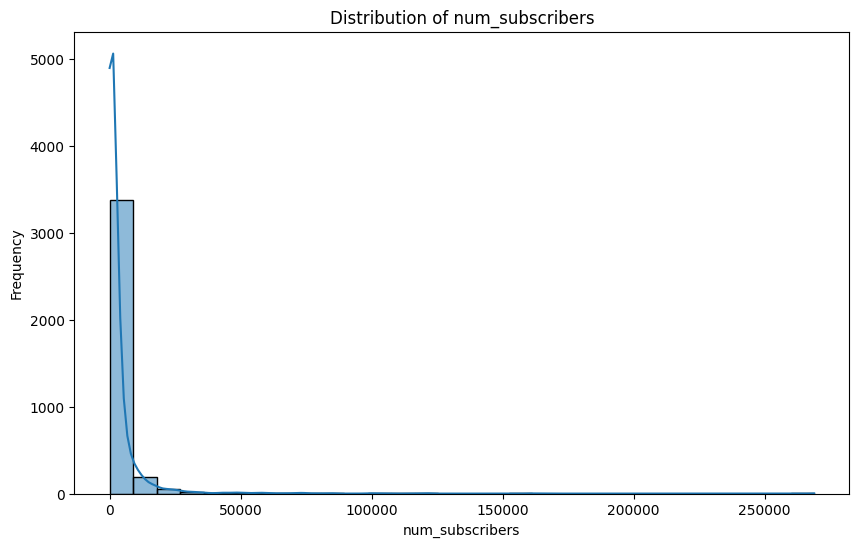

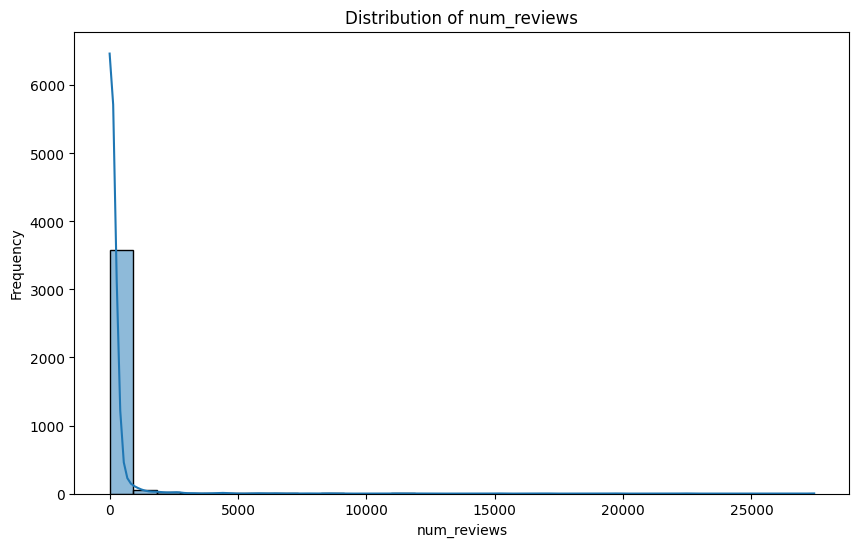

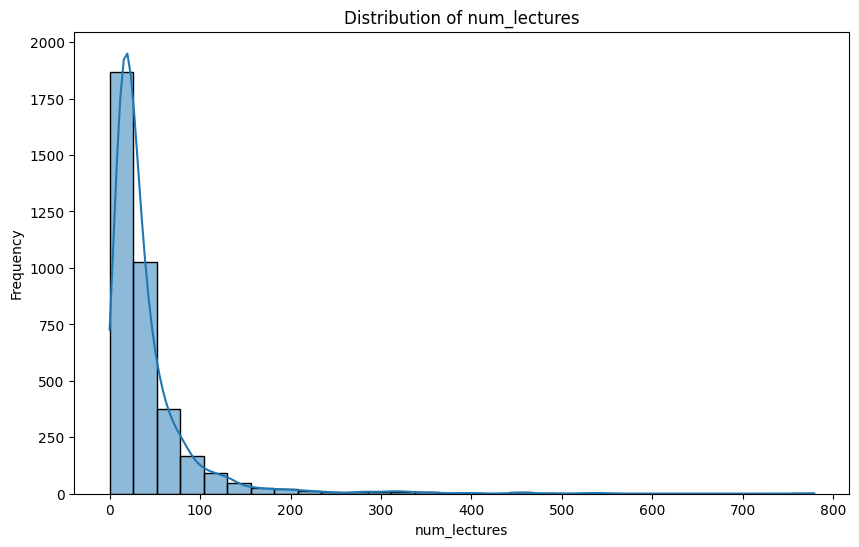

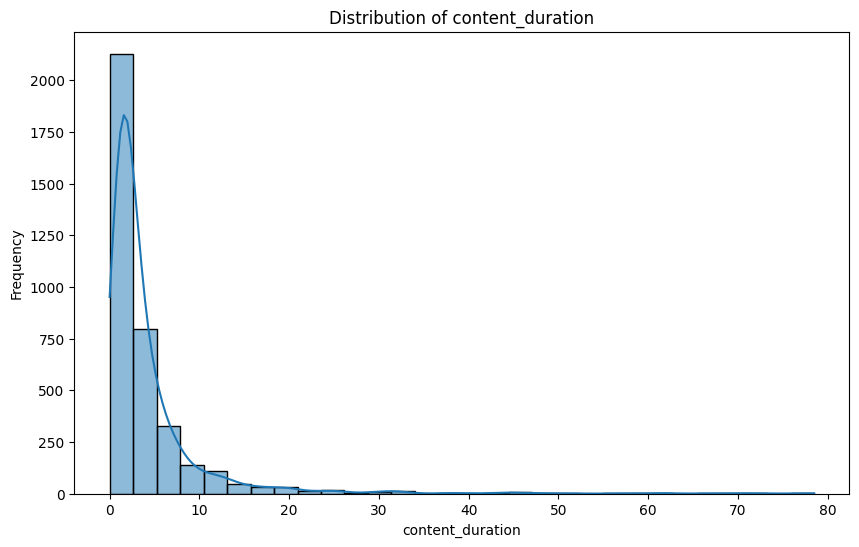

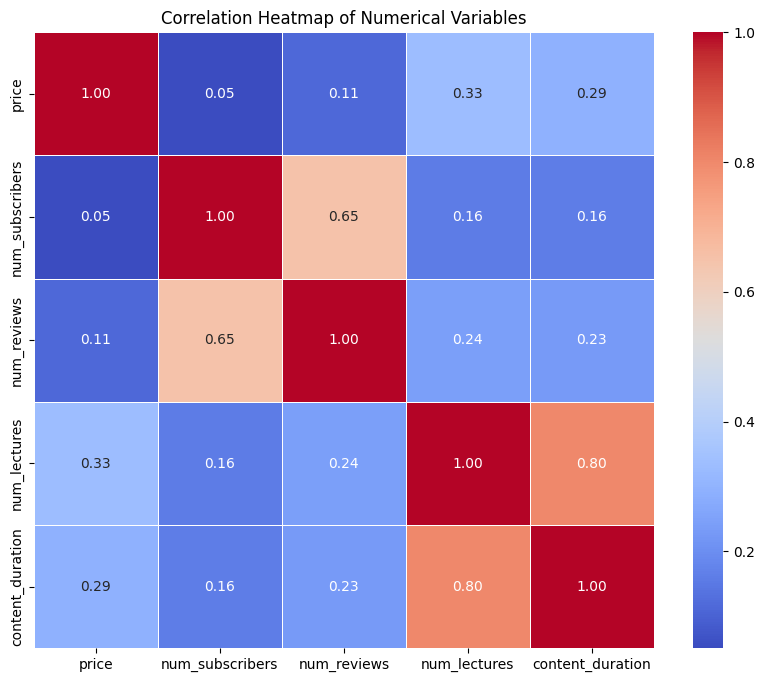


Recommendations for courses related to 'Finance':
735         Finance for Non-Finance: Learn Quick and Easy
1187                   Finance for Non Finance Executives
748     The Fundamentals Of Finance For Non-Finance Pr...
395                                     Practical Finance
594          Finance Fundamentals for Non Finance Leaders
Name: course_title, dtype: object

Evaluation Metrics for Recommendations based on Number of Reviews:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Enter a keyword related to the course you are interested in: web

Recommendations for courses related to 'web':
3596    Web Application Development - Learn by Buildin...
3090                The All-In-One Web Development Course
2589    Web Design for Web Developers: Build Beautiful...
2660                      Introduction to Web Development
2607                      Introduction to Web Development
Name: course_title, dtype: object


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Read csv file
def read_csv_file(file_path):
    df = pd.read_csv('/content/udemy_courses.csv')
    return df

# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

# Display unique values for each column
def display_unique_values(df):
    unique_values = df.nunique()
    return unique_values

# Visualize categorical variables
def visualize_categorical_variables(df, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()

# Visualize numerical variables
def visualize_numerical_variables(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Correlation heatmap for numerical variables
def correlation_heatmap(df, num_cols):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Variables')
    plt.show()

# Convert categorical variables using one-hot encoding
def encode_categorical(df):
    cat_cols = ['level', 'subject']
    encoder = OneHotEncoder()
    encoded_cols = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out(cat_cols))
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(cat_cols, axis=1, inplace=True)
    return df

# Process text data (course_title) using TfidfVectorizer
def process_text_data(df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['course_title'])
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    df = pd.concat([df, tfidf_df], axis=1)
    df.drop('course_title', axis=1, inplace=True)
    return df

# Normalize numerical variables
def normalize_numerical(df):
    num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

# Feature Engineering Pipeline
def feature_engineering(df):
    # Convert categorical variables
    df = encode_categorical(df)

    # Process text data
    df = process_text_data(df)

    # Normalize numerical variables
    df = normalize_numerical(df)

    return df

# Compute the cosine similarity matrix
def compute_similarity_matrix(tfidf_matrix):
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

# Get recommendations based on keyword
def get_recommendations(keyword, tfidf_vectorizer, tfidf_matrix, cosine_sim, df, top_n=5):
    keyword_matrix = tfidf_vectorizer.transform([keyword])
    sim_scores = cosine_similarity(keyword_matrix, tfidf_matrix)
    sim_scores = sim_scores.flatten()
    sim_indices = np.argsort(sim_scores)[::-1][:top_n]
    return df.iloc[sim_indices]['course_title']

# Define function to get predicted recommendations based on number of reviews
def get_predicted_recommendations(df, column='num_reviews', top_n=5):
    predicted_recommendations = df.sort_values(by=column, ascending=False)['course_title'].head(top_n).tolist()
    return predicted_recommendations

# Function to compute evaluation metrics
def evaluate_recommendations(actual, predicted):
    precision = precision_score(actual, predicted, average='micro')
    recall = recall_score(actual, predicted, average='micro')
    f1 = f1_score(actual, predicted, average='micro')
    return precision, recall, f1

def main():
    # Read csv file
    df = read_csv_file('/content/udemy_courses.csv')

    # Check for missing values
    missing_values = check_missing_values(df)
    print("Missing Values:\n", missing_values)

    # Display unique values for each column
    unique_values = display_unique_values(df)
    print("\nUnique Values:\n", unique_values)

    # Visualize categorical variables
    cat_cols = ['is_paid', 'level', 'subject']
    visualize_categorical_variables(df, cat_cols)

    # Visualize numerical variables
    num_cols = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']
    visualize_numerical_variables(df, num_cols)

    # Correlation heatmap for numerical variables
    correlation_heatmap(df, num_cols)

    # Apply feature engineering to the dataset
    df_featured = feature_engineering(df.copy())

    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['course_title'])

    # Compute cosine similarity matrix
    cosine_sim = compute_similarity_matrix(tfidf_matrix)

    # Get recommendations for the keyword 'python'
    keyword = 'Finance'
    recommendations = get_recommendations(keyword, tfidf_vectorizer, tfidf_matrix, cosine_sim, df, top_n=5)
    print("\nRecommendations for courses related to '{}':".format(keyword))
    print(recommendations)


    # Get predicted recommendations based on number of reviews
    predicted_recommendations_reviews = get_predicted_recommendations(df, column='num_reviews')

    # Evaluate recommendations based on number of reviews
    ground_truth_reviews = df.sort_values(by='num_reviews', ascending=False)['course_title'].head(5).tolist()
    precision_reviews, recall_reviews, f1_reviews = evaluate_recommendations(ground_truth_reviews, predicted_recommendations_reviews)

    # Print evaluation metrics for recommendations based on number of reviews
    print("\nEvaluation Metrics for Recommendations based on Number of Reviews:")
    print("Precision:", precision_reviews)
    print("Recall:", recall_reviews)
    print("F1-score:", f1_reviews)

    keyword = input("Enter a keyword related to the course you are interested in: ")
    recommendations = get_recommendations(keyword, tfidf_vectorizer, tfidf_matrix, cosine_sim, df, top_n=5)
    print("\nRecommendations for courses related to '{}':".format(keyword))
    print(recommendations)

if __name__ == "__main__":
    main()
